In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('./datasets/Data_Preprocessing/Data.csv')
for label, content in dataset.items():
    print('label ', label)
    print('content', content, sep='\n')

label  Country
content
0     France
1      Spain
2    Germany
3      Spain
4    Germany
5     France
6      Spain
7     France
8    Germany
9     France
Name: Country, dtype: object
label  Age
content
0    44.0
1    27.0
2    30.0
3    38.0
4    40.0
5    35.0
6     NaN
7    48.0
8    50.0
9    37.0
Name: Age, dtype: float64
label  Salary
content
0    72000.0
1    48000.0
2    54000.0
3    61000.0
4        NaN
5    58000.0
6    52000.0
7    79000.0
8    83000.0
9    67000.0
Name: Salary, dtype: float64
label  Purchased
content
0     No
1    Yes
2     No
3     No
4    Yes
5    Yes
6     No
7    Yes
8     No
9    Yes
Name: Purchased, dtype: object


In [3]:
dataset.columns
dataset.keys()

Index(['Country', 'Age', 'Salary', 'Purchased'], dtype='object')

In [4]:
for axis, val in dataset.iterrows():
    print(val['Country'])

France
Spain
Germany
Spain
Germany
France
Spain
France
Germany
France


In [5]:
dataset.xs(3)

Country      Spain
Age             38
Salary       61000
Purchased       No
Name: 3, dtype: object

In [6]:
dataset.get('Age')

0    44.0
1    27.0
2    30.0
3    38.0
4    40.0
5    35.0
6     NaN
7    48.0
8    50.0
9    37.0
Name: Age, dtype: float64

In [7]:
dataset['age_sub'] = dataset['Age'].apply(pow, args=(2,))
print(dataset)

   Country   Age   Salary Purchased  age_sub
0   France  44.0  72000.0        No   1936.0
1    Spain  27.0  48000.0       Yes    729.0
2  Germany  30.0  54000.0        No    900.0
3    Spain  38.0  61000.0        No   1444.0
4  Germany  40.0      NaN       Yes   1600.0
5   France  35.0  58000.0       Yes   1225.0
6    Spain   NaN  52000.0        No      NaN
7   France  48.0  79000.0       Yes   2304.0
8  Germany  50.0  83000.0        No   2500.0
9   France  37.0  67000.0       Yes   1369.0


In [8]:
dataset.corr()


,Age,Salary,age_sub
Age,1.000000,0.982495,0.995753
Salary,0.982495,1.000000,0.981875
age_sub,0.995753,0.981875,1.000000


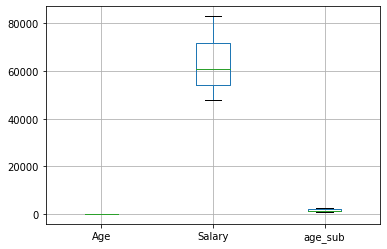

In [9]:
dataset.boxplot(['Age', 'Salary', 'age_sub'])

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
Country      10 non-null object
Age          9 non-null float64
Salary       9 non-null float64
Purchased    10 non-null object
age_sub      9 non-null float64
dtypes: float64(3), object(2)
memory usage: 480.0+ bytes


In [67]:
X = dataset.loc[:, ['Country', 'Age', 'Salary']].values
Y = dataset.iloc[:, -1].values

# taking care of missing values

In [68]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X[:, 1:3] = imputer.fit_transform(X[:, 1:3])
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

# categorical data

In [6]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le_X = LabelEncoder()
X[:, 0] = le_X.fit_transform(X[:, 0])
X

array([[0, 44.0, 72000.0],
       [2, 27.0, 48000.0],
       [1, 30.0, 54000.0],
       [2, 38.0, 61000.0],
       [1, 40.0, 63777.77777777778],
       [0, 35.0, 58000.0],
       [2, 38.77777777777778, 52000.0],
       [0, 48.0, 79000.0],
       [1, 50.0, 83000.0],
       [0, 37.0, 67000.0]], dtype=object)

In [65]:
from sklearn.compose import ColumnTransformer 
ct = ColumnTransformer([("Name_Of_Your_Step", OneHotEncoder(categories='auto'),[0])], remainder="passthrough") # The last arg ([0]) is the list of columns you want to transform in this step
X = ct.fit_transform(X)    

In [66]:
for x in X:
    print(x)

[1.0 0.0 0.0 44.0 72000.0]
[0.0 0.0 1.0 27.0 48000.0]
[0.0 1.0 0.0 30.0 54000.0]
[0.0 0.0 1.0 38.0 61000.0]
[0.0 1.0 0.0 40.0 63777.77777777778]
[1.0 0.0 0.0 35.0 58000.0]
[0.0 0.0 1.0 38.77777777777778 52000.0]
[1.0 0.0 0.0 48.0 79000.0]
[0.0 1.0 0.0 50.0 83000.0]
[1.0 0.0 0.0 37.0 67000.0]


In [69]:
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)
Y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [70]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe.fit(X[:, 0:1])
a = ohe.transform(X[:, 0:1])
a

<10x3 sparse matrix of type '<class 'numpy.float64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [71]:
print(a.toarray())
print(X[:, 1:])

[[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]
[[44.0 72000.0]
 [27.0 48000.0]
 [30.0 54000.0]
 [38.0 61000.0]
 [40.0 63777.77777777778]
 [35.0 58000.0]
 [38.77777777777778 52000.0]
 [48.0 79000.0]
 [50.0 83000.0]
 [37.0 67000.0]]


In [72]:
X = np.concatenate((a.toarray()[:, 1:], X[:, 1:]), axis=1)
X

array([[0.0, 0.0, 44.0, 72000.0],
       [0.0, 1.0, 27.0, 48000.0],
       [1.0, 0.0, 30.0, 54000.0],
       [0.0, 1.0, 38.0, 61000.0],
       [1.0, 0.0, 40.0, 63777.77777777778],
       [0.0, 0.0, 35.0, 58000.0],
       [0.0, 1.0, 38.77777777777778, 52000.0],
       [0.0, 0.0, 48.0, 79000.0],
       [1.0, 0.0, 50.0, 83000.0],
       [0.0, 0.0, 37.0, 67000.0]], dtype=object)

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[1.0 0.0 40.0 63777.77777777778]
 [0.0 0.0 37.0 67000.0]
 [0.0 1.0 27.0 48000.0]
 [0.0 1.0 38.77777777777778 52000.0]
 [0.0 0.0 48.0 79000.0]
 [0.0 1.0 38.0 61000.0]
 [0.0 0.0 44.0 72000.0]
 [0.0 0.0 35.0 58000.0]]
[[1.0 0.0 30.0 54000.0]
 [1.0 0.0 50.0 83000.0]]
[1 1 1 0 1 0 0 1]
[0 0]


# Feature scalling

In [76]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
print(X_train, X_test)

[[ 2.64575131 -0.77459667  0.26306757  0.12381479]
 [-0.37796447 -0.77459667 -0.25350148  0.46175632]
 [-0.37796447  1.29099445 -1.97539832 -1.53093341]
 [-0.37796447  1.29099445  0.05261351 -1.11141978]
 [-0.37796447 -0.77459667  1.64058505  1.7202972 ]
 [-0.37796447  1.29099445 -0.0813118  -0.16751412]
 [-0.37796447 -0.77459667  0.95182631  0.98614835]
 [-0.37796447 -0.77459667 -0.59788085 -0.48214934]] [[ 2.64575131 -0.77459667 -1.45882927 -0.90166297]
 [ 2.64575131 -0.77459667  1.98496442  2.13981082]]
